## Читаем файл и делаем из него нужный нам словарь

В начале нам нужно обработать изначальные данные и получить из скачанного нами датасета словарь, который будет удобен для работы и постройки графиков.  Перед этим мы убрали ненужные знаки, сделали так, чтобы числа в словаре были float, а не str.

In [10]:
with open('data/student_exam_scores.csv') as f: # Reading the file
    file_content = f.readlines()

In [12]:
for i in range(len(file_content)): # Remove unnecessary signs from list
    file_content[i] = file_content[i].replace('\n', '').split(',')
    
file_content

[['student_id',
  'hours_studied',
  'sleep_hours',
  'attendance_percent',
  'previous_scores',
  'exam_score'],
 ['S001', '8.0', '8.8', '72.1', '45', '30.2'],
 ['S002', '1.3', '8.6', '60.7', '55', '25.0'],
 ['S003', '4.0', '8.2', '73.7', '86', '35.8'],
 ['S004', '3.5', '4.8', '95.1', '66', '34.0'],
 ['S005', '9.1', '6.4', '89.8', '71', '40.3'],
 ['S006', '8.4', '5.1', '58.5', '75', '35.7'],
 ['S007', '10.8', '6.0', '54.2', '88', '37.9'],
 ['S008', '2.0', '4.3', '75.8', '55', '18.3'],
 ['S009', '5.6', '5.9', '81.6', '84', '34.7'],
 ['S010', '1.3', '8.9', '66.8', '70', '24.7'],
 ['S011', '3.4', '5.3', '90.9', '81', '29.3'],
 ['S012', '6.6', '7.9', '87.6', '85', '35.1'],
 ['S013', '1.3', '6.3', '83.6', '71', '31.2'],
 ['S014', '3.2', '6.1', '61.2', '68', '30.2'],
 ['S015', '8.1', '8.8', '60.0', '90', '41.1'],
 ['S016', '7.0', '9.0', '51.2', '41', '34.1'],
 ['S017', '3.4', '6.8', '62.2', '45', '28.9'],
 ['S018', '7.5', '7.6', '73.8', '58', '36.3'],
 ['S019', '9.9', '4.8', '92.5', '54', '

In [14]:
for i in range(1, len(file_content)): # Numbers to int and float from str
    for t in range(1, len(file_content[i])):
        if file_content[i][t].find('.') != -1:
            file_content[i][t] = float(file_content[i][t])
        else:
            file_content[i][t] = int(file_content[i][t])

In [16]:
file = {} # Creat a dictionary and adding data to it
value = []

for t in range(len(file_content[1])):
    for i in range(1, len(file_content)):
        value.append(file_content[i][t])
    file[file_content[0][t]] = value
    value = []

## Построим графики

Проверим, есть ли зависимость между успеваемостью студентов и их количеством сна. Для этого построим следующие графики:

График зависимости посещаемости от часов сна 

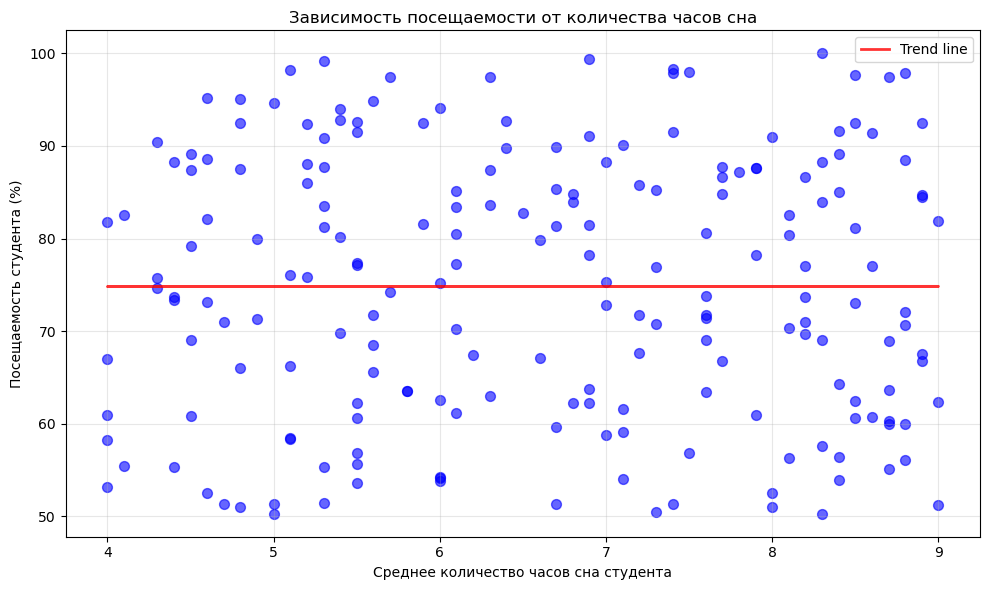

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from dictionary
sleep_hours = list(file['sleep_hours'])
attendance_percent = list(file['attendance_percent'])

# Simple clean scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sleep_hours, attendance_percent, alpha=0.6, color='blue', s=50)

# Add trend line
z = np.polyfit(sleep_hours, attendance_percent, 1)
p = np.poly1d(z)
plt.plot(sleep_hours, p(sleep_hours), "r-", alpha=0.8, linewidth=2, label='Trend line')

plt.xlabel('Среднее количество часов сна студента')
plt.ylabel('Посещаемость студента (%)')
plt.title('Зависимость посещаемости от количества часов сна')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Мы видим по графику, что зависимости нет.

Теперь построим график зависимости оценки, полученной студентом на экзамене от его среднего количества часов сна

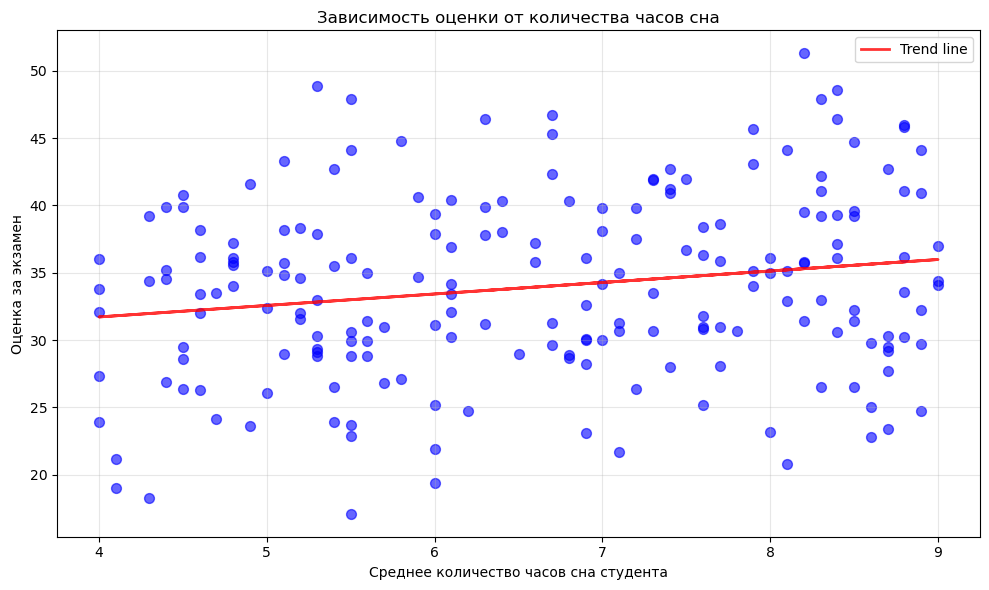

In [33]:
# Extract data from dictionary
sleep_hours = list(file['sleep_hours'])
attendance_percent = list(file['exam_score'])

# Simple clean scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sleep_hours, attendance_percent, alpha=0.6, color='blue', s=50)

# Add trend line
z = np.polyfit(sleep_hours, attendance_percent, 1)
p = np.poly1d(z)
plt.plot(sleep_hours, p(sleep_hours), "r-", alpha=0.8, linewidth=2, label='Trend line')

plt.xlabel('Среднее количество часов сна студента')
plt.ylabel('Оценка за экзамен')
plt.title('Зависимость оценки от количества часов сна')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

На этом графике небольшая зависимость уже прослеживается. В среднем, студенты, которые спят больше, получают более высокую оценку за экзамен.

Следующий график - зависимость оценки за экзамен, от количества часов, которые студент проводил за учебой в день.

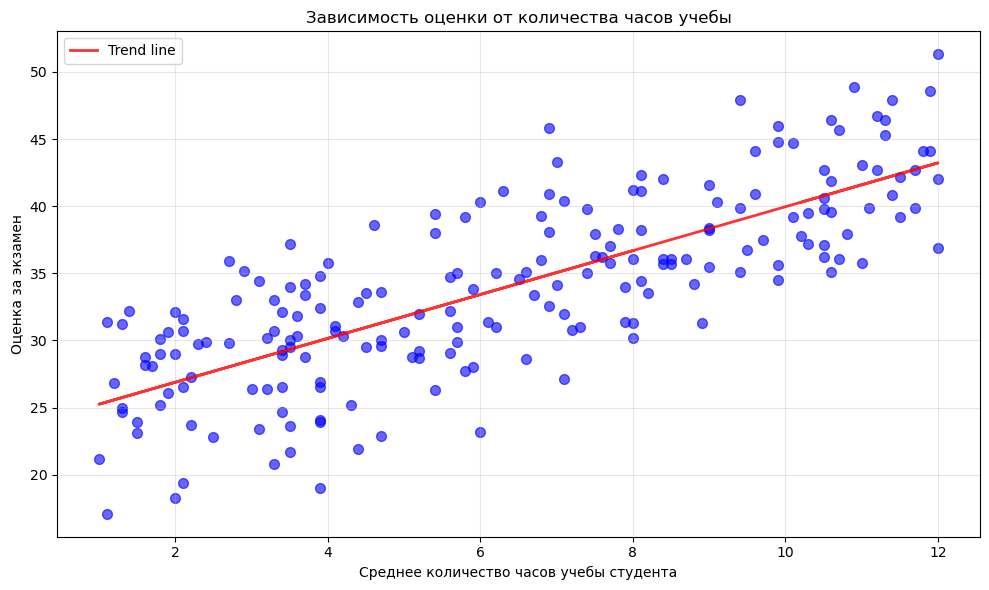

In [35]:
# Extract data from dictionary
sleep_hours = list(file['hours_studied'])
attendance_percent = list(file['exam_score'])

# Simple clean scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sleep_hours, attendance_percent, alpha=0.6, color='blue', s=50)

# Add trend line
z = np.polyfit(sleep_hours, attendance_percent, 1)
p = np.poly1d(z)
plt.plot(sleep_hours, p(sleep_hours), "r-", alpha=0.8, linewidth=2, label='Trend line')

plt.xlabel('Среднее количество часов учебы студента')
plt.ylabel('Оценка за экзамен')
plt.title('Зависимость оценки от количества часов учебы')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

На этот раз видна четка корреляция между количеством часов учебы и оценкой.

## Выводы

Таким образом, используя выборку из нескольких студентов, мы порверили, что влияет на их успеваемость. Результаты показали, что количество часов сна влияет не сильно - есть и те студенты, ктороые спали много, но учились все равно плохо, и наоборот. А вот количество часов учебы влияет намного сильнее - чем больше времени студент тратил на учебу, тем выше его оценка.